In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

from statsmodels.tools.eval_measures import rmse

In [4]:
# Load dataset
df = pd.read_csv('Dataset\co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


## Create Date index

In [5]:
df['Date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day = 1))
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [7]:
# Set "date" to be the index
df.set_index('Date',inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


## Plot dataset

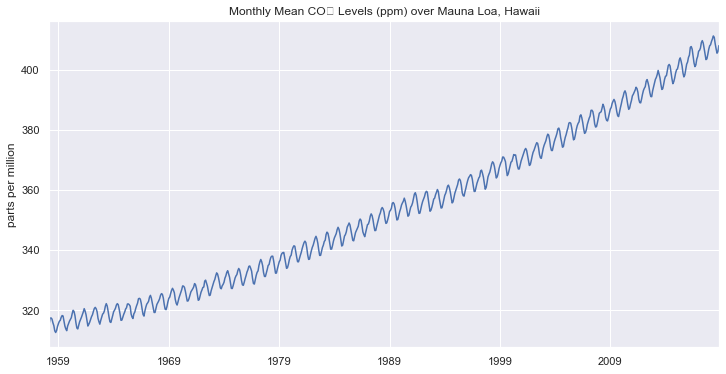

In [8]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Run an ETS Decomposition

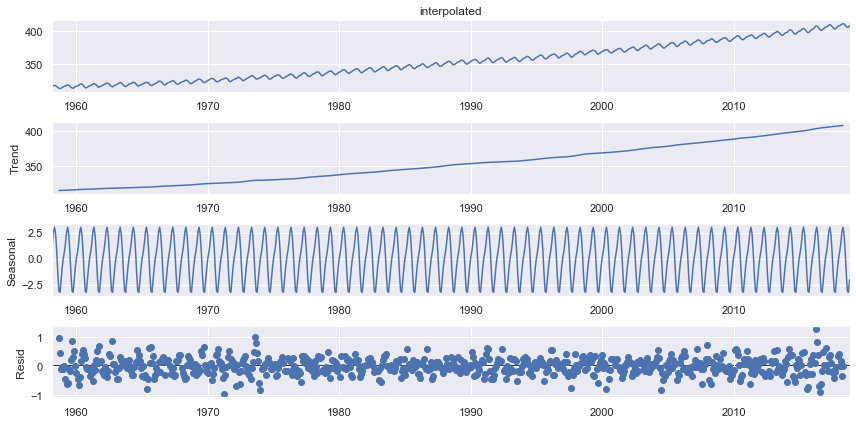

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Although small in scale compared to the overall values, there is a definite annual seasonality.

## Run pmdarima.auto_arima to obtain recommended orders

In [10]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\b

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -221.969
Date:                              Mon, 06 Jul 2020   AIC                            459.938
Time:                                      11:29:28   BIC                            496.661
Sample:                                           0   HQIC                           474.108
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.613      0.540      -0.000       0.000
ar.L1          0.5326      0.417      1.276      0.202      -0.285       1.350
ar.L2          0.1130      0.167      0.678      0.498      -0.214       0.440
ma.L1         -0.8548      0.419     -2.041      0.041      -1.676      -0.034
ma.L2          0.0330      0.276      0.120      0.905      -0.508       0.574
ar.S.L12       0.9960      0.002    636.364      0.000       0.993       0.999
ma.S.L12      -0.7697      0.030    -25.385      0.000      -0.829      -0.710
sigma2         0.1014      0.005     19.188      0.000       0.091       0.112
===================================================================================
Ljung-Box (Q):                       48.86   Jarque-Bera (JB):                 2.34
Prob(Q):                              0.16   Prob(JB):                         0.31
Heteroskedasticity (H):               1.02   Skew:                            -0.00
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split dataset

In [12]:
len(df)

729

In [11]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

## Create SARIMA(2, 1, 2)x(1, 0, [1], 12) model

In [13]:
model = SARIMAX(train['interpolated'],order=(2,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -204.452
Date:                              Mon, 06 Jul 2020   AIC                            422.904
Time:                                      11:36:34   BIC                            454.920
Sample:                                  03-01-1958   HQIC                           435.267
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0492      0.319     -0.154      0.878      -0.675       0.577
ar.L2          0.1835      0.107      1.714      0.087      -0.026       0.393
ma.L1         -0.2950      0.318     -0.926      0.354      -0.919       0.329
ma.L2         -0.2446      0.193     -1.269      0.205      -0.622       0.133
ar.S.L12       0.9991      0.001   1327.848      0.000       0.998       1.001
ma.S.L12      -0.8188      0.027    -30.439      0.000      -0.872      -0.766
sigma2         0.0947      0.005     20.322      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       42.84   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.35   Prob(JB):                         0.19
Heteroskedasticity (H):               1.11   Skew:                             0.03
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,2)(1,0,1,12) Predictions')

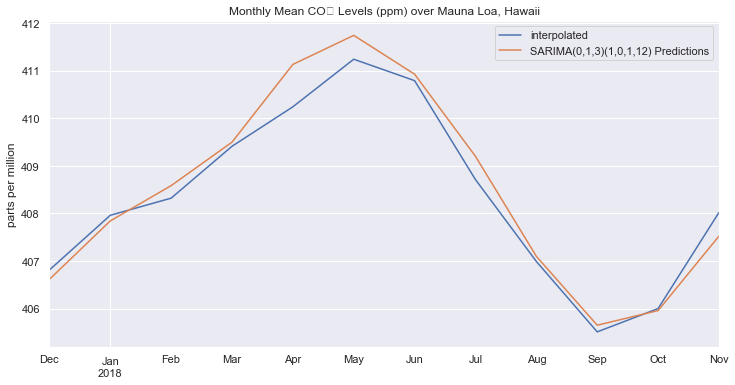

In [15]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [16]:
error = rmse(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 0.3778320134


C:\Users\User\miniconda3\envs\ds\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


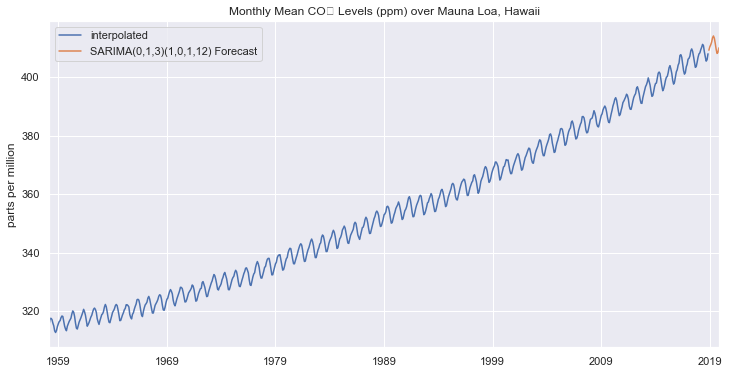

In [18]:
model = SARIMAX(df['interpolated'],order=(2,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,2)(1,0,1,12) Forecast')

title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);